# **VesselBoost Toolbox**
## Module 2 - Test Time Adaptation
VesselBoost provides a Test Time Adaptation module for further optimization of a pre-trained model.

### Pre-trained models
We currently provide 3 pre-trained models (manual, om1, and om2) on Open Science Framework, which you can easily download by running the following cell:


In [ ]:
import os
os.mkdir('./../saved_models/')
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_0429 ./manual_0429
# !osf -p abk4p fetch /pretrained_models/omelette1_0429 ./omelette1_0429
# !osf -p abk4p fetch /pretrained_models/omelette2_0429 ./omelette2_0429

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 27.9Mbytes/s]


To illustrate the usage of our toolbox, we will download a public MRA dataset next:

In [4]:
# Download the data
!mkdir -p ./../data/img/
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/withSkull/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii ./../data/img/GRE_400um.nii

100%|████████████████████████████████████| 164M/164M [00:04<00:00, 34.4Mbytes/s]


### TTA without provided proxies 
You can use this module directly with your data, with and without a proxy segmentation. If a proxy segmentation is not provided, this module will automatically generate proxies with our pre-trained model, which are then used for TTA. Similar to *predict* module, there are four distinct settings for data preprocessing:
 - Set prep_mode to 1 for N4 bias field correction only;
 - Set prep_mode to 2 for denoising only;
 - Set prep_mode to 3 for both.;
 - Set prep_mode to 0 for no preprocessing.

If preprocessing is required, please explicitly pass a path to store the preprocessed images to **--ps_path** argument -- for more details, please refer to *Module_Prediction* notebook.
Below we illustrate the usage of this module with a sample MRA image and without preprocessing.

In [5]:
!mkdir -p ./../saved_imgs/generated_tta_label/
!python ./../test_time_adaptation.py \
    --ds_path ./../data/img/ \
    --out_path ./../saved_imgs/generated_tta_label/ \
    --pretrained ./../saved_models/manual_0429 \
    --ep 10 \
    --lr 1e-3 \
    --prep_mode 4 

./../saved_imgs/generated_tta_label/proxies/ does not exist.
./../saved_imgs/generated_tta_label/proxies/ has been created!
./../saved_imgs/generated_tta_label/finetuned/ does not exist.
./../saved_imgs/generated_tta_label/finetuned/ has been created!
TTA session will start shortly..
Aborting the preprocessing procedure!

No proxies are provided, strating generating proxies...
Running with GPU
/scratch/user/uqmxu4/Tools/VesselBoost_backup/library/module_utils.py:237: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

The maximum intensity projection image of the generated segmentation can be seen below:

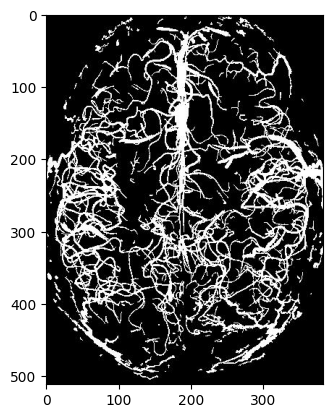

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../saved_imgs/generated_tta_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

### TTA with provided proxies

Alternatevely, you can provide a proxy segmentation to be used for test time adaption. This segmentation can be created using any method, including manual segmentation or other, non-deep-learning methods. Note that the segmentation file name has to be the same as the raw image, but in a different location.\
This usage case is illustrated below:

In [7]:
!mkdir ./../saved_imgs/generated_tta_label_2/ 
!python ./../test_time_adaptation.py --ds_path ./../data/img/ \
        --px_path ./../saved_imgs/generated_tta_label/proxies/ \
        --out_path ./../saved_imgs/generated_tta_label_2/ \
        --pretrained ./../saved_models/manual_0429 \
        --prep_mode 4 \
        --ep 10 \
        --lr 1e-3 

./../saved_imgs/generated_tta_label_2/finetuned/ does not exist.
./../saved_imgs/generated_tta_label_2/finetuned/ has been created!
TTA session will start shortly..
Aborting the preprocessing procedure!

Proxies are provided!
Running with GPU
/scratch/user/uqmxu4/Tools/VesselBoost_backup/library/train_utils.py:108: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you 

And here is the MIP image:

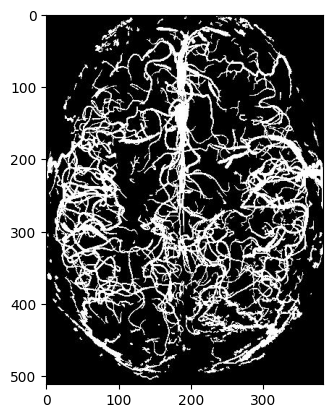

In [8]:
mip_image = img.imread("./../saved_imgs/generated_tta_label_2/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')